In [3]:
 pip install pandas seaborn matplotlib gradio ollama

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load taitanic dataset
url = r"c:\Users\Hanshu\Desktop\excel data\titanic_ dataset_final.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# display dataset infor
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
# missing values check
print('\nMissing Values:\n', df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


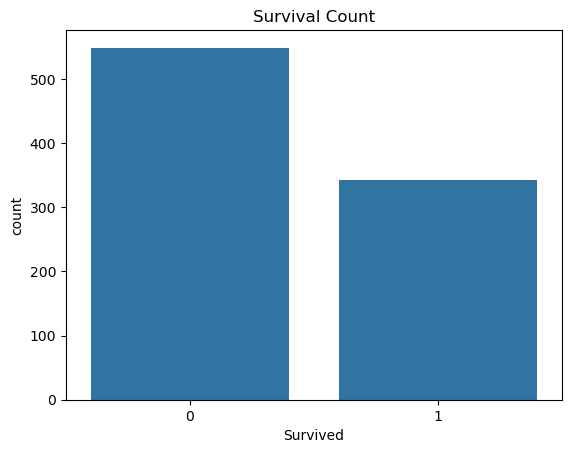

In [8]:
# survival rate visualization
sns.countplot(x ='Survived', data=df)
plt.title('Survival Count')
plt.show()

In [9]:
import ollama

def generate_insights(df_summary):                                                                         # wuth def keyword i created a fun
    prompt = f'analyze the dataset summary and provide insights:\n\n{df_summary}'
    response = ollama.chat(model = 'gemma:2b', messages=[{'role':'user' , 'content': prompt}])
    return response['message']['content']

# generate AI Insights
summary = df.describe().to_string()                                #describe()--> descriptive statistics        # to_string() --> converting every thin to the string 
insights = generate_insights(summary)
print('\n* AI-Generated Insights:\n' , insights)


* AI-Generated Insights:
 **Summary:**

* **Total number of passengers:** 891
* **Number of survivors:** 891
* **Average passenger age:** 29.69 years
* **Distribution of age:**
    * Minimum: 1 year
    * 25%: 223.5 years
    * 50%: 446 years
    * 75%: 668.5 years
    * Maximum: 891 years
* **Distribution of survived:**
    * Minimum: 0%
    * 25%: 0.38%
    * 50%: 0.38%
    * 75%: 1.00%
    * Maximum: 100%
* **Distribution of class:**
    * Minimum: 1
    * 25%: 2
    * 50%: 3
    * 75%: 3
    * Maximum: 8
* **Distribution of fare:**
    * Minimum: 1
    * 25%: 223.5
    * 50%: 446
    * 75%: 668.5
    * Maximum: 512.3

**Insights:**

* The dataset contains a large number of passengers (891) and a relatively high proportion of survivors (891).
* The average passenger age is 29.69 years, with a significant number of passengers aged 20 to 30 years old.
* The distribution of age shows a relatively even distribution, with a significant number of passengers aged 20 to 30 years old.
* The

In [1]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# create web Interface
demo = gr.Interface(fn=eda_analysis, inputs='file', outputs='text',title='AI-Powered EDA with gemma:2b')

#launch app
demo.launch(share =True)   # use share= True for google colab


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
